# Лабораторная работа 2
### Выполнил: Борисов Д.А.

### EDA (исследовательский анализ данных)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [7]:
my_seed = 12345
random.seed(my_seed)
np.random.seed(my_seed)

#### Загрузка данных

In [8]:
X = pd.read_csv("DOTA2_TRAIN_features.csv")
X.set_index("match_id", inplace=True)

X.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id,,,,,,,,,,,,,,,,,,,,,
b29797296e310d2275f2cd67eeacf2eb,2117,22,7,15,1,5,4.0,9,15,0,...,0.133,3,1,7,0,0.405,0,0,0,0
49908f2a11d8bc01f6dad6fbf2e39326,3914,22,7,28,177,87,3.0,15,22,5,...,0.000,5,2,14,0,0.352,0,0,1,0
a68557919e4353f6067ddd3a04b980b0,100000000,22,0,6,1,42,0.0,0,1,1,...,17.462,0,0,10,0,0.625,0,0,0,0
f6273df443c5a8b192b633ef2ce34304,475,22,7,1,3,48,0.0,1,0,0,...,0.000,0,0,3,1,0.500,0,0,0,0
71b98e3c7cc8701ad425a69d3923ec8f,581,22,7,1,1,41,0.0,0,0,3,...,0.000,0,0,1,0,0.000,0,0,0,0


In [9]:
X.describe()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
count,2.777200e+04,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,24995.000000,27772.000000,27772.000000,27772.000000,...,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000
mean,3.000534e+06,19.587354,4.780678,6.523765,7.427877,51.204523,3.135947,3.264547,4.666571,6.260046,...,11.807556,1.037232,0.341495,4.680073,0.090199,0.414851,0.298970,0.024341,1.272073,0.793857
std,1.705725e+07,6.303789,3.257337,6.507055,13.607843,34.650816,3.710659,3.300977,5.252099,8.174090,...,20.600379,3.521645,0.951968,4.642444,0.286471,0.268232,0.733285,0.170314,2.612230,2.465862
min,0.000000e+00,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-6.191000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.317500e+02,22.000000,0.000000,1.000000,0.000000,20.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.231000,0.000000,0.000000,0.000000,0.000000
50%,1.075000e+03,22.000000,7.000000,4.000000,3.000000,44.000000,2.000000,2.000000,3.000000,3.000000,...,1.533000,0.000000,0.000000,3.000000,0.000000,0.441000,0.000000,0.000000,0.000000,0.000000
75%,1.724000e+03,22.000000,7.000000,10.000000,9.000000,81.000000,5.000000,5.000000,7.000000,9.000000,...,16.048000,0.000000,0.000000,7.000000,0.000000,0.594250,0.000000,0.000000,1.000000,0.000000
max,1.000000e+08,23.000000,7.000000,41.000000,291.000000,120.000000,31.000000,27.000000,40.000000,83.000000,...,211.684000,132.000000,26.000000,52.000000,1.000000,2.000000,8.000000,5.000000,25.000000,47.000000


In [10]:
y = pd.read_csv("DOTA2_TRAIN_targets.csv")
y.set_index("match_id", inplace=True)

y.head()

,radiant_win
match_id,
b29797296e310d2275f2cd67eeacf2eb,False
49908f2a11d8bc01f6dad6fbf2e39326,True
a68557919e4353f6067ddd3a04b980b0,True
f6273df443c5a8b192b633ef2ce34304,False
71b98e3c7cc8701ad425a69d3923ec8f,False


In [11]:
y.describe()

,radiant_win
count,27772
unique,2
top,True
freq,14521


In [12]:
X_submit= pd.read_csv("DOTA2_TEST_features.csv")
X_submit.set_index("match_id", inplace=True)

X_submit.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id,,,,,,,,,,,,,,,,,,,,,
3071feff2631bd8ca93d0d182e5b9249,542,23,0,6,0,95,1,2,3,0,...,0.000,0,0,1,0,0.400,0,0,0,0
785b46a41ad7fc643b2fe870e18435e9,843,22,7,3,18,2,0,1,1,3,...,1.899,0,0,6,0,0.500,0,0,3,0
4856a3ccfd84dbd0ab25c0529815978e,491,22,0,1,4,18,0,0,1,0,...,1.500,0,0,0,0,0.333,0,0,0,0
bea45c19efef0f86c03a70280380185d,1167,22,7,4,0,41,4,0,4,14,...,0.000,0,0,9,0,0.714,0,0,1,0
77859b5baddd3a6d0cb05721d9494456,1032,22,7,5,0,84,2,2,4,9,...,15.263,1,1,1,0,0.600,0,0,0,0


In [13]:
X_submit.describe()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
count,11903.000000,11903.000000,11903.000000,11903.000000,11903.000000,11903.000000,11903.000000,11903.000000,11903.000000,11903.000000,...,11903.000000,11903.000000,11903.000000,11903.000000,11903.000000,11903.000000,11903.000000,11903.000000,11903.000000,11903.000000
mean,1149.493573,19.578762,4.752919,6.527430,7.129967,50.866588,3.179115,3.278753,4.678568,6.358649,...,11.693459,1.043182,0.346971,4.692851,0.089977,0.418554,0.301773,0.024616,1.262791,0.758632
std,761.129916,6.308007,3.268194,6.457368,12.783409,34.491661,3.749532,3.241875,5.162607,8.273157,...,20.527402,3.563805,0.990673,4.645210,0.286161,0.265948,0.730659,0.170941,2.563068,2.371474
min,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-4.381000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,534.000000,22.000000,0.000000,1.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000
50%,1049.000000,22.000000,7.000000,4.000000,3.000000,44.000000,2.000000,2.000000,3.000000,3.000000,...,1.483000,0.000000,0.000000,3.000000,0.000000,0.444000,0.000000,0.000000,0.000000,0.000000
75%,1656.000000,22.000000,7.000000,10.000000,9.000000,79.000000,5.000000,5.000000,7.000000,9.000000,...,15.996000,0.000000,0.000000,7.000000,0.000000,0.600000,0.000000,0.000000,1.000000,0.000000
max,4933.000000,23.000000,7.000000,43.000000,189.000000,120.000000,32.000000,22.000000,34.000000,84.000000,...,277.618000,107.000000,29.000000,57.000000,1.000000,1.667000,9.000000,4.000000,26.000000,47.000000


---

#### Детальное изучение

In [14]:
# Ознакомление с типами данных:
X.dtypes.groupby(by=X.dtypes).count()

int64      210
float64     35
dtype: int64

Можно заметить, что все данные имеют типы `int64` и `float64`. Таким образом, можем сделать вывод, что для разделения признаков на категориальные и числовые опираться на тип данных окажется проблематичным.

In [15]:
# Изучение информации о пропущенных значениях:
print('Кол-во NaN:', X.isna().sum().sum())
X.isna().sum().sort_values(ascending=False).head(10)

Кол-во NaN: 13885


r4_kills                 2777
r5_kills                 2777
r2_kills                 2777
r1_kills                 2777
r3_kills                 2777
d2_firstblood_claimed       0
d2_rune_pickups             0
d2_camps_stacked            0
d2_creeps_stacked           0
d2_y                        0
dtype: int64

Т.к. данные пропущены только в столбцах 'r1_kills', 'r2_kills', 'r3_kills', 'r4_kills', 'r5_kills', можно детальнее ознакомится с данными признаками

In [16]:
X[['r1_kills', 'r2_kills', 'r3_kills', 'r4_kills', 'r5_kills']].head(10)

,r1_kills,r2_kills,r3_kills,r4_kills,r5_kills
match_id,,,,,
b29797296e310d2275f2cd67eeacf2eb,4.0,6.0,13.0,5.0,2.0
49908f2a11d8bc01f6dad6fbf2e39326,3.0,NaN,5.0,9.0,16.0
a68557919e4353f6067ddd3a04b980b0,0.0,0.0,2.0,NaN,10.0
f6273df443c5a8b192b633ef2ce34304,0.0,NaN,0.0,1.0,2.0
71b98e3c7cc8701ad425a69d3923ec8f,0.0,1.0,0.0,1.0,0.0
ba0532a0fe1adb8ea24b2ad058538e85,4.0,0.0,3.0,3.0,2.0
de640d7e3d82ee34cd77bc2c67ba28ca,NaN,6.0,8.0,9.0,18.0
86b496a935d7191a4c4c12f5ad9382c3,0.0,1.0,0.0,NaN,1.0
072b6fbd5ae40e73ac4dec1be1ee91c9,10.0,12.0,9.0,2.0,1.0


При изучении тренировочного датасета были замечены предположительные выбросы у значений признака `game_time`.

Text(0.5, 1.0, 'game_time<10000')

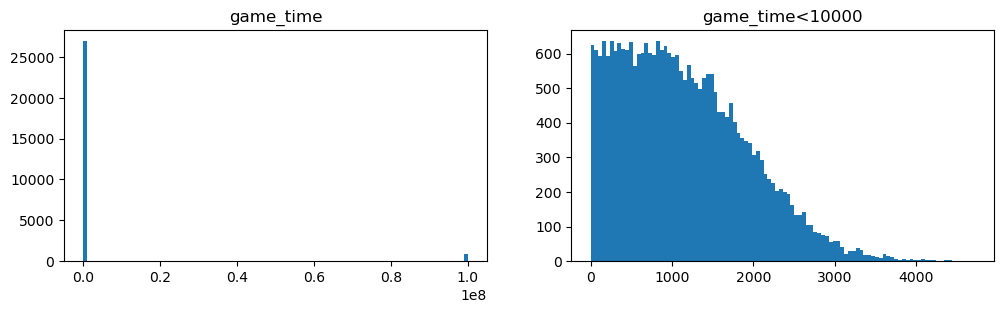

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))

ax[0].hist(X.game_time, bins=100);
ax[0].set_title('game_time')

ax[1].hist(X.game_time[X.game_time<10000], bins=100);
ax[1].set_title('game_time<10000')


После изучения гистограмм можно предположить, что значения большие 5000 скорее всего являются выбросами

In [18]:
print('Кол-во "неправдоподобно" больших значений game_time:')
X[X.game_time > 5000].shape[0]

Кол-во "неправдоподобно" больших значений game_time:


833

Далее были составлены корреляционные тепловые карты по:
1. Информации об одном игроке (r1) и общих данных
2. Информации по всему датасету

<Axes: >

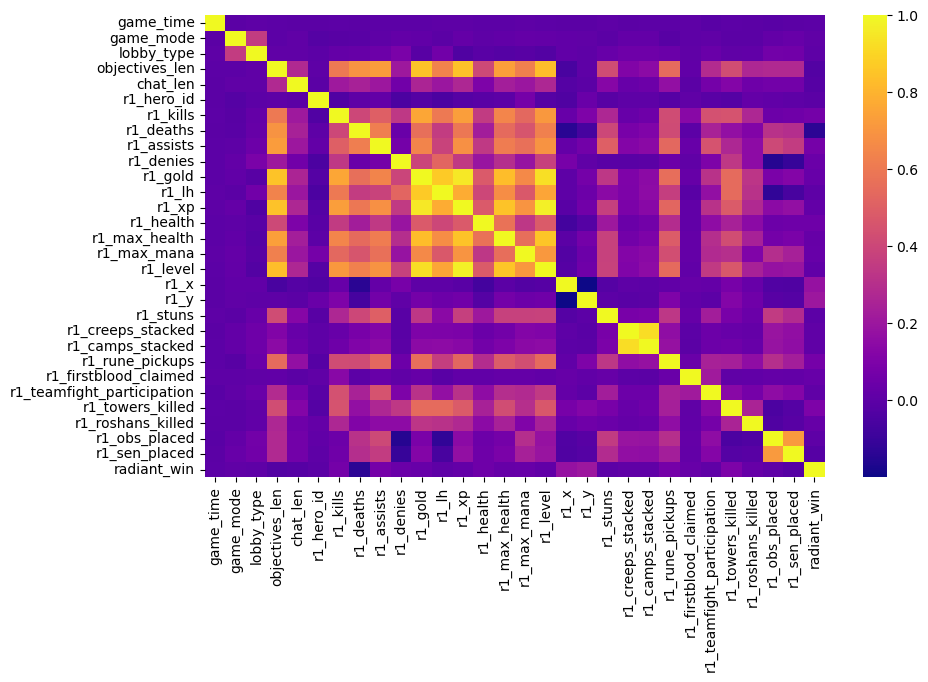

In [19]:
# Корреляционная тепловая карта для 1 игрока:

corr_data = X.iloc[:, :29]
corr_data['radiant_win'] = y

cor = corr_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(cor, cmap=plt.cm.plasma)

### Preprocessing

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, QuantileTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

In [21]:
# Директория для хранения кэша пайплайнов
cache_dir = r'D:\lab_temp'

На этапе предобработки данных было принято решение создать список категориальных признаков. Определение категориальных признаков осуществлялось изучением названий признаков и соответствующих значений.

In [22]:
# Список категориальных переменых:
cat_list = ['game_mode', 'lobby_type',
            'r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id',
            'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id',
            'r1_firstblood_claimed', 'r2_firstblood_claimed', 'r3_firstblood_claimed',
            'r4_firstblood_claimed', 'r5_firstblood_claimed',
            'd1_firstblood_claimed', 'd2_firstblood_claimed', 'd3_firstblood_claimed',
            'd4_firstblood_claimed', 'd5_firstblood_claimed'
            ]

# Индексы столбцов категориальных признаков:
cat_columns = np.array([X.columns.get_loc(cat) for cat in cat_list])

# Индексы столбцов числовых признаков:
num_columns = np.setdiff1d(np.arange(245), cat_columns)

numeric_transformer = Pipeline(
    memory=cache_dir,
    steps=[('imputer',  SimpleImputer(strategy='median')),
           ('scaler', StandardScaler())]
)

categorical_transformer = Pipeline(
    memory=cache_dir,
    steps=[('imputer',  SimpleImputer(strategy='most_frequent')),
           ('encoder', OneHotEncoder(handle_unknown='ignore',
                                     sparse_output=False))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformer, num_columns),
        ('categorical', categorical_transformer, cat_columns)
    ]
)

In [23]:
len(cat_columns), len(num_columns)

(22, 223)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=my_seed)

In [25]:
# Исключение выбросов:
X_train = X_train[X_train.game_time < 5000]
y_train = y_train[y_train.index.isin(X_train.index)]

X_train.shape, y_train.shape

((21553, 245), (21553, 1))

In [26]:
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

y_cv = np.array(y).ravel()

### Эксперимент 1
Использование SVM

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [24]:
from sklearn.svm import SVC

In [25]:
%%time

svm_c = Pipeline(
    memory=cache_dir,
    steps=[("preprocessor", preprocessor),
           ("classifier", SVC(random_state=my_seed))]
)
svm_c.fit(X_train,y_train)
print(f'ROC-AUC: {roc_auc_score(y_test, svm_c.predict(X_test))}')

ROC-AUC: 0.7161372721068539
CPU times: total: 6min 50s
Wall time: 6min 51s


### Эксперимент 2
Использование AdaBoost

In [26]:
from sklearn.ensemble import AdaBoostClassifier

In [27]:
from sklearn.feature_selection import SelectKBest

In [28]:
%%time

ada_boost = Pipeline(
    memory=cache_dir,
    steps=[('preprocessor', preprocessor),
           ('classifier', AdaBoostClassifier(algorithm='SAMME',
                                             random_state=my_seed))]
)

ada_boost.fit(X_train, y_train)

print('roc_auc_score:', roc_auc_score(y_test, ada_boost.predict(X_test)))

roc_auc_score: 0.6758831367196386
CPU times: total: 35.8 s
Wall time: 35.9 s


Подбор гиперпараметров требует больших затрат времени и вычислительных ресурсов. По этой причине было принято решение сократить количество признаков

In [29]:
%%time

ada_boost_skb = Pipeline(
    memory=cache_dir,
    steps=[('preprocessor', preprocessor),
           ("feature_selection", SelectKBest(k=100)),
           ('classifier', AdaBoostClassifier(algorithm='SAMME',
                                             random_state=my_seed))]
)

param_grid = {
    'classifier__n_estimators': [200, 500],
    'classifier__learning_rate': [0.05, 0.1, 1.0]
}

ada_boost_gs = GridSearchCV(ada_boost_skb, param_grid, cv=5, scoring='roc_auc')

ada_boost_gs.fit(X_train, y_train)

CPU times: total: 11min 45s
Wall time: 11min 48s


GridSearchCV(cv=5,
             estimator=Pipeline(memory='D:\\lab_temp',
                                steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(memory='D:\\lab_temp',
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         array([  0,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  24,  25,  26,  27,  28,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         array([  1,   2,   5,  29,  53,  77, 101, 125, 149, 173, 197, 221,  23,
        47,  71,  95, 119, 143, 167, 191, 215, 239]))])),
                                       ('feature_selection',
                                        SelectKBest(k=100)),
                                       ('classifier',
                                        AdaBoostClassifier(algorithm='SAMME',
                                                           random_state=12345))]),
             param_grid={'classifier__learning_rate': [0.05, 0.1, 1.0],
                         'classifier__n_estimators': [200, 500]},
             scoring='roc_auc')

In [30]:
print('AdaBoost best score:', ada_boost_gs.best_score_)
print('AdaBoost best parameters:')
print(ada_boost_gs.best_params_)

AdaBoost best score: 0.778115039606935
AdaBoost best parameters:
{'classifier__learning_rate': 1.0, 'classifier__n_estimators': 500}


In [195]:
%%time

ada_boost_best = Pipeline(
    memory=cache_dir,
    steps=[('preprocessor', preprocessor),
           ('classifier', AdaBoostClassifier(algorithm='SAMME',
                                             learning_rate=1.0,
                                             n_estimators=500,
                                             random_state=my_seed))]
)

ada_boost_best.fit(X_train, y_train)

CPU times: total: 4min 40s
Wall time: 4min 40s


Pipeline(memory='D:\\lab_temp',
         steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(memory='D:\\lab_temp',
                                                           steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  array([  0,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  24,  25,  26,  27,  28,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  48,  49,  50,  51,...
                                                 ('categorical',
                                                  Pipeline(memory='D:\\lab_temp',
                                                           steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  array([  1,   2,   5,  29,  53,  77, 101, 125, 149, 173, 197, 221,  23,
        47,  71,  95, 119, 143, 167, 191, 215, 239]))])),
                ('classifier',
                 AdaBoostClassifier(algorithm='SAMME', n_estimators=500,
                                    random_state=12345))])

In [196]:
print(f'ROC-AUC: {roc_auc_score(y_test, ada_boost_best.predict(X_test))}')

ROC-AUC: 0.7054385622826688


### Эксперимент 3
Использование CatBoostClassifier

In [33]:
!pip install catboost

In [115]:
from catboost import CatBoostClassifier

In [35]:
%%time

cat_bst = Pipeline(
    memory=cache_dir,
    steps=[('preprocessor', preprocessor),
           ('classifier', CatBoostClassifier(verbose=False,
                                             eval_metric='AUC',
                                             random_state=my_seed))]
)

cat_bst.fit(X_train, y_train)

CPU times: total: 2min 14s
Wall time: 27 s


Pipeline(memory='D:\\lab_temp',
         steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(memory='D:\\lab_temp',
                                                           steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  array([  0,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  24,  25,  26,  27,  28,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  48,  49,  50,  51,...
       243, 244])),
                                                 ('categorical',
                                                  Pipeline(memory='D:\\lab_temp',
                                                           steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  array([  1,   2,   5,  29,  53,  77, 101, 125, 149, 173, 197, 221,  23,
        47,  71,  95, 119, 143, 167, 191, 215, 239]))])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x000001A600328A90>)])

In [36]:
print('roc_auc_score:', roc_auc_score(y_test, cat_bst.predict(X_test)))

roc_auc_score: 0.7155081082837736


In [37]:
%%time

catbst_skb = Pipeline(
    memory=cache_dir,
    steps=[
        ("preprocessor", preprocessor),
        ("feature_selection", SelectKBest(k=100)),
        ("classifier", CatBoostClassifier(verbose=False,
                                          eval_metric='AUC',
                                          iterations=200,
                                          random_state=my_seed))
    ]
)

param_grid = {
        'classifier__l2_leaf_reg': [1, 3, 10],
        'classifier__min_data_in_leaf': [1, 3, 5],
        'classifier__depth': [4, 6, 10]
    }

catbst_skb_gs = GridSearchCV(catbst_skb, param_grid, cv=5, scoring='roc_auc')
catbst_skb_gs.fit(X_train, y_train)

CPU times: total: 1h 26min 50s
Wall time: 15min 34s


GridSearchCV(cv=5,
             estimator=Pipeline(memory='D:\\lab_temp',
                                steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(memory='D:\\lab_temp',
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         array([  0,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  24,  25,  26,  27,  28,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41...
                                                                                                        sparse_output=False))]),
                                                                         array([  1,   2,   5,  29,  53,  77, 101, 125, 149, 173, 197, 221,  23,
        47,  71,  95, 119, 143, 167, 191, 215, 239]))])),
                                       ('feature_selection',
                                        SelectKBest(k=100)),
                                       ('classifier',
                                        <catboost.core.CatBoostClassifier object at 0x000001A600481970>)]),
             param_grid={'classifier__depth': [4, 6, 10],
                         'classifier__l2_leaf_reg': [1, 3, 10],
                         'classifier__min_data_in_leaf': [1, 3, 5]},
             scoring='roc_auc')

In [38]:
print('CatBoost best score:', catbst_skb_gs.best_score_)
print('CatBoost best parameters:')
print(catbst_skb_gs.best_params_)

CatBoost best score: 0.7814014623729219
CatBoost best parameters:
{'classifier__depth': 10, 'classifier__l2_leaf_reg': 10, 'classifier__min_data_in_leaf': 1}


In [39]:
catbst_gs_best = Pipeline(
    memory=cache_dir,
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", CatBoostClassifier(verbose=False,
                                          eval_metric='AUC',
                                          depth=10,
                                          l2_leaf_reg=10,
                                          min_data_in_leaf=1,
                                          random_state=my_seed))
    ]
)

catbst_gs_best.fit(X_train, y_train)
print('roc_auc_score:', roc_auc_score(y_test, catbst_gs_best.predict(X_test)))

roc_auc_score: 0.7108910987618212


In [191]:
scores = cross_val_score(catbst_gs_best, X, y_cv, cv=5, scoring='roc_auc')
print("Cross-validation roc_auc scores:", scores)
print("Mean roc_auc:", scores.mean())

Cross-validation roc_auc scores: [0.80858021 0.8057669  0.80068221 0.79979911 0.80134583]
Mean roc_auc: 0.8032348511042946


### Эксперимент 4
Использование XGBClassifier

In [40]:
!pip install xgboost

In [41]:
import xgboost as xgb

In [183]:
%%time

xgb_c = Pipeline(
    memory=cache_dir,
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', xgb.XGBClassifier(eval_metric='auc',
                                         objective='binary:logistic',
                                         random_state=my_seed))
    ]
)

xgb_c.fit(X_train, y_train)

CPU times: total: 18.4 s
Wall time: 2.75 s


Pipeline(memory='D:\\lab_temp',
         steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(memory='D:\\lab_temp',
                                                           steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  array([  0,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  24,  25,  26,  27,  28,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  48,  49,  50,  51,...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=12345, ...))])

In [184]:
print('roc_auc_score: ', roc_auc_score(y_test, xgb_c.predict(X_test)))

roc_auc_score:  0.69870169965227


In [185]:
%%time

xgbc_skb = Pipeline(
    memory=cache_dir,
    steps=[
        ("preprocessor", preprocessor),
        ("feature_selection", SelectKBest(k=200)),
        ("classifier", xgb.XGBClassifier(eval_metric='auc',
                                         objective='binary:logistic',
                                         learning_rate=0.05,
                                         n_estimators=200,
                                         random_state=12345))
    ]
)

param_grid = {
        'classifier__subsample': [0.5, 1],
        'classifier__lambda': [0, 1, 5],
        'classifier__alpha': [0, 1, 5]
    }

xgbc_skb_gs = GridSearchCV(xgbc_skb, param_grid, cv=5, scoring='roc_auc')
xgbc_skb_gs.fit(X_train, y_train)

CPU times: total: 18min 42s
Wall time: 2min 52s


GridSearchCV(cv=5,
             estimator=Pipeline(memory='D:\\lab_temp',
                                steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(memory='D:\\lab_temp',
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         array([  0,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  24,  25,  26,  27,  28,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=200,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=12345, ...))]),
             param_grid={'classifier__alpha': [0, 1, 5],
                         'classifier__lambda': [0, 1, 5],
                         'classifier__subsample': [0.5, 1]},
             scoring='roc_auc')

In [186]:
print('roc_auc_score: ', roc_auc_score(y_test, xgbc_skb_gs.predict(X_test)))
print('XGBoost best score:', xgbc_skb_gs.best_score_)
print('XGBoost best parameters:')
print(xgbc_skb_gs.best_params_)

roc_auc_score:  0.707052094504566
XGBoost best score: 0.7983285464978427
XGBoost best parameters:
{'classifier__alpha': 1, 'classifier__lambda': 1, 'classifier__subsample': 0.5}


In [156]:
%%time
xgbc_skb_best = Pipeline(
    memory=cache_dir,
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", xgb.XGBClassifier(eval_metric='auc',
                                         objective='binary:logistic',
                                         learning_rate=0.05,
                                         n_estimators=1000,
                                         subsample=0.5,
                                         reg_lambda=1,
                                         reg_alpha=1,
                                         random_state=my_seed))
    ]
)

xgbc_skb_best.fit(X_train, y_train)

CPU times: total: 2min 47s
Wall time: 23.6 s


Pipeline(memory='D:\\lab_temp',
         steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(memory='D:\\lab_temp',
                                                           steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  array([  0,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  24,  25,  26,  27,  28,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  48,  49,  50,  51,...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1000, n_jobs=None,
                               num_parallel_tree=None, random_state=12345, ...))])

In [197]:
print('roc_auc_score: ', roc_auc_score(y_test, xgbc_skb_best.predict(X_test)))

roc_auc_score:  0.7206077150563843


In [198]:
scores = cross_val_score(xgbc_skb_best, X, y_cv, cv=5, scoring='roc_auc')
print("Cross-validation roc_auc scores:", scores)
print("Mean roc_auc:", scores.mean())

Cross-validation roc_auc scores: [0.81674375 0.80882265 0.80667667 0.80583327 0.80498376]
Mean roc_auc: 0.8086120197548083


### Эксперимент 5
Использование LightGBM

In [28]:
!pip install lightgbm

In [29]:
import lightgbm as lgb

In [50]:
%%time

lgbm_c = Pipeline(
    memory=cache_dir,
    steps=[('preprocessor', preprocessor),
           ('classifier', lgb.LGBMClassifier(verbosity=-1,
                                             force_col_wise=True,
                                             objective='binary',
                                             random_state=my_seed))
    ]
)

lgbm_c.fit(X_train, y_train)

CPU times: total: 5.97 s
Wall time: 1.85 s


Pipeline(memory='D:\\lab_temp',
         steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(memory='D:\\lab_temp',
                                                           steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  array([  0,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  24,  25,  26,  27,  28,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  48,  49,  50,  51,...
                                                  Pipeline(memory='D:\\lab_temp',
                                                           steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  array([  1,   2,   5,  29,  53,  77, 101, 125, 149, 173, 197, 221,  23,
        47,  71,  95, 119, 143, 167, 191, 215, 239]))])),
                ('classifier',
                 LGBMClassifier(force_col_wise=True, objective='binary',
                                random_state=12345, verbosity=-1))])

In [51]:
print('roc_auc_test:', roc_auc_score(y_test, lgbm_c.predict(X_test)))

roc_auc_test: 0.7089499853758409


In [194]:
%%time

param_grid = {
    'classifier__max_bin': [200, 300],
    'classifier__reg_alpha': [0, 5, 10],
    'classifier__reg_lambda': [0, 5, 10],
    'classifier__bagging':[0.5, 1]
}

lgbm_c_gs = GridSearchCV(lgbm_c, param_grid, cv=5, scoring='roc_auc')

lgbm_c_gs.fit(X_train, y_train)

CPU times: total: 16min 52s
Wall time: 4min 46s


GridSearchCV(cv=5,
             estimator=Pipeline(memory='D:\\lab_temp',
                                steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(memory='D:\\lab_temp',
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         array([  0,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  24,  25,  26,  27,  28,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41...
                                                                         array([  1,   2,   5,  29,  53,  77, 101, 125, 149, 173, 197, 221,  23,
        47,  71,  95, 119, 143, 167, 191, 215, 239]))])),
                                       ('classifier',
                                        LGBMClassifier(force_col_wise=True,
                                                       objective='binary',
                                                       random_state=12345,
                                                       verbosity=-1))]),
             param_grid={'classifier__bagging': [0.5, 1],
                         'classifier__max_bin': [200, 300],
                         'classifier__reg_alpha': [0, 5, 10],
                         'classifier__reg_lambda': [0, 5, 10]},
             scoring='roc_auc')

In [202]:
print('roc_auc_score: ', roc_auc_score(y_test, lgbm_c_gs.predict(X_test)))
print('XGBoost best score:', lgbm_c_gs.best_score_)
print('XGBoost best parameters:')
print(lgbm_c_gs.best_params_)

roc_auc_score:  0.7129007832049656
XGBoost best score: 0.801047380111007
XGBoost best parameters:
{'classifier__bagging': 0.5, 'classifier__max_bin': 300, 'classifier__reg_alpha': 0, 'classifier__reg_lambda': 10}


In [199]:
%%time

lgbm_c_best = Pipeline(
    memory=cache_dir,
    steps=[('preprocessor', preprocessor),
           ('classifier', lgb.LGBMClassifier(n_estimators=1000,
                                             learning_rate=0.05,
                                             max_bin=300,
                                             reg_alpha = 0,
                                             reg_lambda = 10,
                                             bagging=0.5,
                                             force_col_wise=True,
                                             n_jobs=-1,
                                             verbosity=-1,
                                             random_state=my_seed))
    ]
)

lgbm_c_best.fit(X_train, y_train)

CPU times: total: 1min 11s
Wall time: 10.5 s


Pipeline(memory='D:\\lab_temp',
         steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(memory='D:\\lab_temp',
                                                           steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  array([  0,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  24,  25,  26,  27,  28,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  48,  49,  50,  51,...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  array([  1,   2,   5,  29,  53,  77, 101, 125, 149, 173, 197, 221,  23,
        47,  71,  95, 119, 143, 167, 191, 215, 239]))])),
                ('classifier',
                 LGBMClassifier(bagging=0.5, force_col_wise=True,
                                learning_rate=0.05, max_bin=300,
                                n_estimators=1000, n_jobs=-1,
                                random_state=12345, reg_alpha=0, reg_lambda=10,
                                verbosity=-1))])

In [200]:
print('roc_auc_test:', roc_auc_score(y_test, lgbm_c_best.predict(X_test)))

roc_auc_test: 0.7199031555685548


In [201]:
scores = cross_val_score(lgbm_c_best, X, y_cv, cv=5, scoring='roc_auc')
print("Cross-validation roc_auc scores:", scores)
print("Mean roc_auc:", scores.mean())

Cross-validation roc_auc scores: [0.81908563 0.81323742 0.80857113 0.81015905 0.81049626]
Mean roc_auc: 0.8123098990632627


### Эксперимент 6
Использование RandomForestClassifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
%%time

rfc = Pipeline(
    memory=cache_dir,
    steps=[('preprocessor', preprocessor),
           ('feature_selection', SelectKBest(k=100)),
           ('classifier',RandomForestClassifier(n_jobs=-1,
                                                random_state=my_seed))
    ]
)

rfc.fit(X_train, y_train)

print('roc_auc:', roc_auc_score(y_test, rfc.predict(X_test)))

roc_auc: 0.6851155308569756
CPU times: total: 16.2 s
Wall time: 2.77 s


In [58]:
%%time

param_grid = {
    'classifier__min_samples_leaf': [1, 3, 5],
    'classifier__max_depth': [6, 10],
    'classifier__max_leaf_nodes': [6, 10],
}

rfc_gs = GridSearchCV(rfc, param_grid, cv=3, scoring='roc_auc')

rfc_gs.fit(X_train, y_train)

CPU times: total: 30 s
Wall time: 40.2 s


GridSearchCV(cv=3,
             estimator=Pipeline(memory='D:\\lab_temp',
                                steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(memory='D:\\lab_temp',
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         array([  0,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  24,  25,  26,  27,  28,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41...
                                                                                                        sparse_output=False))]),
                                                                         array([  1,   2,   5,  29,  53,  77, 101, 125, 149, 173, 197, 221,  23,
        47,  71,  95, 119, 143, 167, 191, 215, 239]))])),
                                       ('feature_selection',
                                        SelectKBest(k=100)),
                                       ('classifier',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=12345))]),
             param_grid={'classifier__max_depth': [6, 10],
                         'classifier__max_leaf_nodes': [6, 10],
                         'classifier__min_samples_leaf': [1, 3, 5]},
             scoring='roc_auc')

In [59]:
print('roc_auc_score: ', roc_auc_score(y_test, rfc_gs.predict(X_test)))
print('RandomForest best score:', rfc_gs.best_score_)
print('RandomForest best parameters:')
print(rfc_gs.best_params_)

roc_auc_score:  0.6465997205160703
RandomForest best score: 0.7447915783199409
RandomForest best parameters:
{'classifier__max_depth': 6, 'classifier__max_leaf_nodes': 10, 'classifier__min_samples_leaf': 1}


In [74]:
%%time

rfc_best = Pipeline(
    memory=cache_dir,
    steps=[('preprocessor', preprocessor),
           ('classifier', RandomForestClassifier(n_estimators=500,
                                                 max_depth=6,
                                                 max_leaf_nodes=10,
                                                 min_samples_leaf=1,
                                                 n_jobs=-1,
                                                 random_state=my_seed))
    ]
)

rfc_best.fit(X_train, y_train)

CPU times: total: 33.4 s
Wall time: 5.24 s


Pipeline(memory='D:\\lab_temp',
         steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(memory='D:\\lab_temp',
                                                           steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  array([  0,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  24,  25,  26,  27,  28,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  48,  49,  50,  51,...
                                                  Pipeline(memory='D:\\lab_temp',
                                                           steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  array([  1,   2,   5,  29,  53,  77, 101, 125, 149, 173, 197, 221,  23,
        47,  71,  95, 119, 143, 167, 191, 215, 239]))])),
                ('classifier',
                 RandomForestClassifier(max_depth=6, max_leaf_nodes=10,
                                        n_estimators=500, n_jobs=-1,
                                        random_state=12345))])

In [75]:
rfc_best.fit(X_train, y_train)
print('roc_auc_score:', roc_auc_score(y_test, rfc_best.predict(X_test)))

roc_auc_score: 0.6485869812485783


### Evaluation (оценка качества модели)

In [30]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

В качестве итоговой модели была использована модель `LGBMClassifier` с гиперпараметрами, подобранными в *эксперименте 5*. <br>
Выбор модели обусловлен высокой скоростью обучения и хорошими по сравнению с другими моделями показателями качества (ROC-AUC), а также наилучшими результатами кросс-валидации.

In [31]:
%%time
final_model = Pipeline(
    memory=cache_dir,
    steps=[('preprocessor', preprocessor),
           ('classifier', lgb.LGBMClassifier(n_estimators=1000,
                                             learning_rate=0.05,
                                             max_bin=300,
                                             reg_alpha = 0,
                                             reg_lambda = 10,
                                             min_child_weight = 1,
                                             force_col_wise=True,
                                             n_jobs=-1,
                                             verbosity=-1,
                                             random_state=my_seed))
    ]
)

final_model.fit(X_train, y_train)

CPU times: total: 1min 1s
Wall time: 9.96 s


Pipeline(memory='D:\\lab_temp',
         steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(memory='D:\\lab_temp',
                                                           steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  array([  0,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  24,  25,  26,  27,  28,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  48,  49,  50,  51,...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  array([  1,   2,   5,  29,  53,  77, 101, 125, 149, 173, 197, 221,  23,
        47,  71,  95, 119, 143, 167, 191, 215, 239]))])),
                ('classifier',
                 LGBMClassifier(force_col_wise=True, learning_rate=0.05,
                                max_bin=300, min_child_weight=1,
                                n_estimators=1000, n_jobs=-1,
                                random_state=12345, reg_alpha=0, reg_lambda=10,
                                verbosity=-1))])

In [32]:
print('roc_auc_score итоговой модели:', roc_auc_score(y_test, final_model.predict(X_test)))

roc_auc_score итоговой модели: 0.7199031555685548


In [203]:
# Запись итоговых предсказаний в csv-файл:
y_submit = final_model.predict_proba(X_submit)
submit_final_model = pd.DataFrame(data={'radiant_win': y_submit[:, 1]},
                        index=X_submit.index)
submit_final_model.to_csv('submit_final.csv')

Кросс-Валидация:

In [33]:
scores = cross_val_score(final_model, X, y_cv, cv=5, scoring='roc_auc')
print("Cross-validation roc_auc scores:", scores)
print("Mean roc_auc:", scores.mean())

Cross-validation roc_auc scores: [0.81908563 0.81323742 0.80841819 0.81007108 0.81049626]
Mean roc_auc: 0.8122617156857483


Визуализация ROC-кривой

<Figure size 500x500 with 0 Axes>

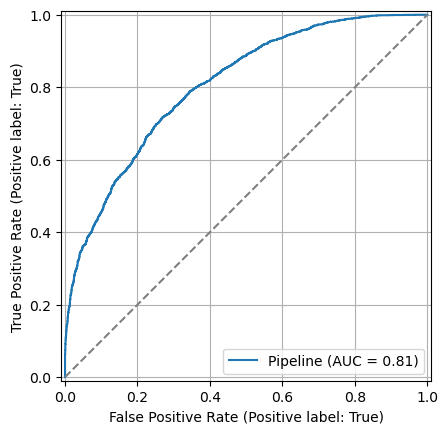

In [49]:
plt.figure(figsize=(5, 5))
RocCurveDisplay.from_estimator(final_model, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random (AUC = 0.5)')
plt.grid()
plt.show()

Отчет о показателях классификации

In [50]:
y_pred = final_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.72      0.68      0.70      2630
        True       0.72      0.76      0.74      2925

    accuracy                           0.72      5555
   macro avg       0.72      0.72      0.72      5555
weighted avg       0.72      0.72      0.72      5555



Визуализация матрицы ошибок

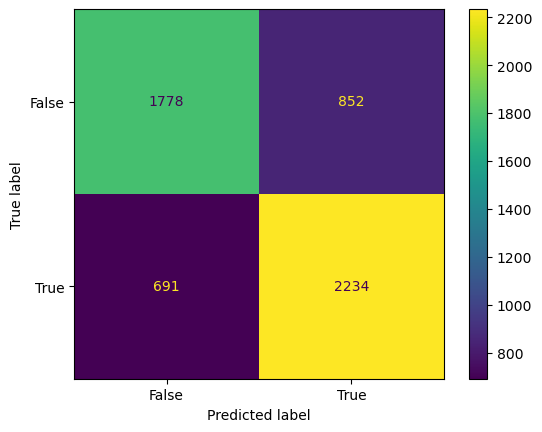

In [51]:
conf_mat = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_mat).from_predictions(y_test, y_pred)


### Conclusion (Выводы)

Было проведено исследование, в ходе которого было проведено ознакомление с различными моделями классификации.  

В процессе выполнения работы были рассмотрены такие модели как:
1. `SVC` (модель `SVM` для задач классификации)
2. `AdaBoostClassifier`
3. `XGBClassifier`
4. `CatBoostClassifier`
5. `LGBMClassifier`
6. `RandomForestClassifier`

Подбор гиперпараметров осуществлялся с помощью GridSearchCV, а итоговые метрики были получены с испоьзованием кросс-валидации.

Наилучшим образом себя показали такие модели как: `SVM`, модели градиентного бустинга и модель нейронной сети

**Замечания по моделям**
- Модель `SVC ` продемонстрировала хорошие результаты предсказаний. Однако, обучение данной модели требует много времени.
- Классификатор `AdaBoost`: при сравнении с классификатором `SVM` обучение происходит быстрее, однако результаты предсказаний менее точные
- Классификатор `CatBoostClassifier` оказался быстрее `SVM` и `AdaBoostClassifier`. Результаты предсказаний превосходят результаты, полученные при помощи `AdaBoostClassifier`.
- Модель градиентного бустинга `XGBClassifier` также показала приемлемые результаты после подбора гиперпараметров. Подбор гиперпараметров производится быстрее по сравнению с `CatBoostClassifier`.
- Классификатор `LGBMClassifier` оказался самым быстрым. За счет высокой скорости поиск гиперпараметров для данной модели занимает меньше времени. После подбора гиперпараметров результаты модели приблизились к результатам предсказаний модели `XGBClassifier'.
- Случайный лес (`RandomForestClassifier`) оказался менее эффективным по сравнению с моделями градиентного бустинга и `SVM`. Был предпринята попытка подбора гиперпараметров, однако, в конечном итоге качество моделей бустинга оказалось выше.

**Вывод:** Таким образом, было проведено исследование различных моделей машинного обучения для задачи бинарной классификации. Было произведено сравнение качества моделей, а также были высказаны замечания по каждой из рассмотренных моделей. Наиболее эффективными оказались модели градиентного бустинга: `XGBClassifier` и `LGBMClassifier`.